# Neural Net

In [1]:
def intitializeAgent():
    
    model = Sequential() 
    
    model.add(Dense(256,activation='relu',input_shape=(INPUT_SIZE,)))
    model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(OUTPUT_SIZE,activation='linear'))
    
    model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
    
    return model

In [2]:
def getPrediction(env,agent):
    env = env.reshape(INPUT_SIZE,1).reshape(1,-1)
    return agent.predict(env)[0]

In [3]:
def getAction(output,invalidActions):
    rand = np.random.rand()
    output[invalidActions] = np.min(output) - 0.1
    
    if rand < 1 - EPSILON_RATE * iteration:
        action = np.random.randint(4)
        while action in invalidActions:
            action = np.random.randint(4)
        return action
    else:
        return np.argmax(output)

In [4]:
def getGreedyAction(output,invalidActions):
    output[invalidActions] = np.min(output) - 0.1
    return np.argmax(output)

In [5]:
def train(initialStateMemory,actionMemory,rewardMemory,finalStateMemory,model,epochs):
    
    if memCount < MAX_MEM_SIZE:
        sample = np.random.choice(memCount, SAMPLE_SIZE)
    else:
        sample = np.random.choice(MAX_MEM_SIZE, SAMPLE_SIZE)
    batchSize = sample.shape[0] // BATCH_SIZE
    
    if batchSize == 0:
        batchSize = 1
                
    targetQs = getTargetQs(initialStateMemory[sample],
                            actionMemory[sample],
                            rewardMemory[sample],
                            finalStateMemory[sample],
                            model)
        
    print("Training Model...")
    model.fit(initialStateMemory[sample],targetQs,batch_size = batchSize, epochs = epochs, verbose = 0)

# Replay Memory

In [6]:
def addMemory(initialState, action, reward, finalState, memCount, MAX_MEM_SIZE):
    if memCount < MAX_MEM_SIZE:
        initialStateMemory[memCount] = initialState.reshape(INPUT_SIZE)
        actionMemory[memCount] = action
        rewardMemory[memCount] = reward
        finalStateMemory[memCount] = finalState.reshape(INPUT_SIZE)
    else:
        rand = np.random.randint(MAX_MEM_SIZE)
        initialStateMemory[rand] = initialState.reshape(INPUT_SIZE)
        actionMemory[rand] = action
        rewardMemory[rand] = reward
        finalStateMemory[rand] = finalState.reshape(INPUT_SIZE)
        
    memCount += 1
    
    return initialStateMemory,actionMemory,rewardMemory,finalStateMemory,memCount

In [7]:
def getTargetQs(states0, actions0, rewards1, states1, agent):
    DISCOUNT_FACTOR = 0.99
    targetQs = np.zeros((len(states0),OUTPUT_SIZE))
    
    for i in range(len(states0)):
        targetQs[i] = getPrediction(states0[i],agent)
        targetQs[i][int(actions0[i])] = rewards1[i] + DISCOUNT_FACTOR * np.max(getPrediction(states1[i],agent))
    return targetQs

# Game Logic

In [8]:
def initializeEnv():
    env = np.zeros((BOARD_LENGTH,BOARD_LENGTH))

    for i in range(2):
        addValue(env)
            
    return env

In [9]:
def addValue(env):
#     rand = np.random.rand()
#     if rand > 0.1:
        # value = 2
#     else:
#         value = 4
    
    value = 2
        
    coordinate1 = random.sample(range(0,BOARD_LENGTH),1)
    coordinate2 = random.sample(range(0,BOARD_LENGTH),1)
        
    if env[coordinate1,coordinate2] != 0:
        getNewCoordinate(env,value)
    else:
        env[coordinate1,coordinate2] = value
        
    return env

In [10]:
def getNewCoordinate(env,value):
    
    coordinate1 = random.sample(range(0,BOARD_LENGTH),1)
    coordinate2 = random.sample(range(0,BOARD_LENGTH),1)
    
    while env[coordinate1,coordinate2] != 0:
        coordinate1 = random.sample(range(0,BOARD_LENGTH),1)
        coordinate2 = random.sample(range(0,BOARD_LENGTH),1)
    
    env[coordinate1,coordinate2] = value

In [11]:
def step(env,action,score):
    
    if action == 0:
        env, score, validAction = actionUp(env,score)
    if action == 1:
        env, score, validAction = actionDown(env,score)
    if action == 2:
        env, score, validAction = actionLeft(env,score)
    if action == 3:
        env, score, validAction = actionRight(env,score)
    
    return env, score, validAction

In [12]:
def actionUp(env,score):
    validAction = False
    
    for i in range(BOARD_LENGTH):
        for j in range(BOARD_LENGTH):
            row = i
            while env[row][j] != 0 and row != 0:
                if env[row - 1][j] != 0:
                    if env[row - 1][j] == env[row][j]:
                        env[row - 1][j] *= 2
                        env[row][j] = 0
                        score += env[row - 1][j]
                        validAction = True
                    break
                temp = env[row][j]
                env[row-1][j] = temp
                env[row][j] = 0
                row -= 1
                validAction = True
    return env, score, validAction

In [13]:
def actionDown(env,score):
    validAction = False
    
    for i in range(3,-1,-1):
        for j in range(BOARD_LENGTH):
            row = i
            while env[row][j] != 0 and row != 3:
                if env[row + 1][j] != 0:
                    if env[row + 1][j] == env[row][j]:
                        env[row + 1][j] *= 2
                        env[row][j] = 0
                        score += env[row + 1][j]
                        validAction = True
                    break
                temp = env[row][j]
                env[row + 1][j] = temp
                env[row][j] = 0
                row += 1
                validAction = True
    return env, score, validAction

In [14]:
def actionLeft(env,score):
    validAction = False
    env = env.T
    
    for i in range(BOARD_LENGTH):
        for j in range(BOARD_LENGTH):
            row = i
            while env[row][j] != 0 and row != 0:
                if env[row - 1][j] != 0:
                    if env[row - 1][j] == env[row][j]:
                        env[row - 1][j] *= 2
                        env[row][j] = 0
                        score += env[row - 1][j]
                        validAction = True
                    break
                temp = env[row][j]
                env[row-1][j] = temp
                env[row][j] = 0
                row -= 1
                validAction = True
    env = env.T
    return env, score, validAction

In [15]:
def actionRight(env,score):
    validAction = False
    env = env.T
    
    for i in range(3,-1,-1):
        for j in range(BOARD_LENGTH):
            row = i
            while env[row][j] != 0 and row != 3:
                if env[row + 1][j] != 0:
                    if env[row + 1][j] == env[row][j]:
                        env[row + 1][j] *= 2
                        env[row][j] = 0
                        score += env[row + 1][j]
                        validAction = True
                    break
                temp = env[row][j]
                env[row + 1][j] = temp
                env[row][j] = 0
                row += 1
                validAction = True
    env = env.T
    return env, score, validAction

In [16]:
def getAvailableAction(env):
    tempEnv = np.copy(env)
    available = False
    
    for i in range(tempEnv.shape[0]):
        for j in range(tempEnv.shape[0] - 1):
            if tempEnv[i][j] == tempEnv[i][j+1]:
                available = True
                
                
    tempEnv = tempEnv.T
    for i in range(tempEnv.shape[0]):
        for j in range(tempEnv.shape[0] - 1):
            if tempEnv[i][j] == tempEnv[i][j+1]:
                available = True
                break
    
    return available

In [17]:
def run(env,agent,memCount,testFlag,score = 0):
    
    gameOver = False
    while gameOver == False:
        invalidActions = []
        validAction = False
        while validAction == False:
            
            if not testFlag:
                previousEnv = np.copy(env)
                previousScore = np.copy(score)
            
            output = getPrediction(env,agent)
            if testFlag: 
                action = getGreedyAction(output,invalidActions) 
            else: 
                action = getAction(output,invalidActions)
            invalidActions.append(action)
            env, score, validAction = step(env, action, score)
        
        if not testFlag:
            initialStateMemory,actionMemory,rewardMemory,finalStateMemory,memCount = addMemory(previousEnv, action, score - previousScore, env, memCount, MAX_MEM_SIZE)

        env = addValue(env)
        
        if np.sum(env == 0) == 0:
            gameOver = not getAvailableAction(env)
    
    if not testFlag:
        return score,initialStateMemory,actionMemory,rewardMemory,finalStateMemory,memCount
    else: 
        return score

# Main Output Functions

In [18]:
def printIter():
    print("\n === === === Iteration",iteration,"of",ITERATIONS,'=== === ===\n')

In [19]:
def printStats(timeLog,iteration,ITERATIONS,memCount,scoreLog,greedyScoreLog,EPISODES,TESTS):
    print("\nEstimated time remaining: ", format(np.mean(timeLog) * (ITERATIONS - iteration) / 60,'.2f')," Minutes\n")
    print("Memories Elapsed: ",memCount)
    print("Current Epsilon: ",format(1 - EPSILON_RATE * iteration,'.4f'))
    print("Ave Score for Epoch: ", format(np.mean(scoreLog[len(scoreLog) - EPISODES : len(scoreLog)-1]) ,'.2f'))
    print("Ave Greedy Score for Epoch: ", format(np.mean(greedyScoreLog[len(greedyScoreLog) - TESTS : len(greedyScoreLog)-1]) ,'.2f'))

In [20]:
def printTrainInfo():
    print("Maximum memory size:",MAX_MEM_SIZE)
    print("Sample size for training:",SAMPLE_SIZE)
    print("Batch size from sample:",BATCH_SIZE)
    print("Epslon Rate:",format(EPSILON_RATE,'.4f'))

# Main

In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import time
import sys

from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Conv2D

Using TensorFlow backend.


In [22]:
BOARD_LENGTH = 4
INPUT_SIZE = 16
OUTPUT_SIZE = BOARD_LENGTH

memCount = 0
MAX_MEM_SIZE = 100_000
SAMPLE_SIZE = MAX_MEM_SIZE // 200
BATCH_SIZE = SAMPLE_SIZE // 100
initialStateMemory = np.zeros((MAX_MEM_SIZE,INPUT_SIZE))
actionMemory = np.zeros(MAX_MEM_SIZE)
rewardMemory = np.zeros(MAX_MEM_SIZE)
finalStateMemory = np.zeros((MAX_MEM_SIZE,INPUT_SIZE))


gameScoreLog = []
greedyScoreLog = []
agent = intitializeAgent()

W0509 13:44:27.807257 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0509 13:44:27.837109 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0509 13:44:27.844098 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0509 13:44:27.858339 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0509 13:44:27.864323 10800 deprecation.py:506

In [23]:
ITERATIONS = 100
EPISODES = 100
TESTS = EPISODES // 5
EPOCHS = 4
MIN_EPSILON = 0.01
EPSILON_RATE = (1 - MIN_EPSILON) / ITERATIONS

In [24]:
startTime = time.time()
timeLog = []

printTrainInfo()

for iteration in range(ITERATIONS):
    printIter()
    iterationStart = time.time()
    
    for i in range(EPISODES):
        score,initialStateMemory,actionMemory,rewardMemory,finalStateMemory,memCount = run(initializeEnv(),agent,memCount,False)
        gameScoreLog.append(score)
    
    for i in range(TESTS):
        score = run(initializeEnv(),agent,memCount,True)
        greedyScoreLog.append(score)
        
    train(initialStateMemory,actionMemory,rewardMemory,finalStateMemory,agent,EPOCHS)
    timeLog.append(time.time() - iterationStart)
    
    printStats(timeLog,iteration,ITERATIONS,memCount,gameScoreLog,greedyScoreLog,EPISODES,TESTS)

    if EPISODES != 25:
        startTime = time.time()
        timeLog = []
        gameScoreLog = []
        greedyScoreLog = []
    
    EPISODES = 25
    TESTS = EPISODES // 5

W0509 13:44:27.964992 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



Maximum memory size: 100000
Sample size for training: 500
Batch size from sample: 5
Epslon Rate: 0.0099

 === === === Iteration 0 of 100 === === ===

Training Model...

Estimated time remaining:  22.29  Minutes

Memories Elapsed:  14141
Current Epsilon:  1.0000
Ave Score for Epoch:  1272.08
Ave Greedy Score for Epoch:  1568.42

 === === === Iteration 1 of 100 === === ===

Training Model...

Estimated time remaining:  4.83  Minutes

Memories Elapsed:  17498
Current Epsilon:  0.9901
Ave Score for Epoch:  1216.33
Ave Greedy Score for Epoch:  785.00

 === === === Iteration 2 of 100 === === ===

Training Model...

Estimated time remaining:  5.02  Minutes

Memories Elapsed:  20715
Current Epsilon:  0.9802
Ave Score for Epoch:  1079.83
Ave Greedy Score for Epoch:  716.00

 === === === Iteration 3 of 100 === === ===

Training Model...

Estimated time remaining:  4.87  Minutes

Memories Elapsed:  24088
Current Epsilon:  0.9703
Ave Score for Epoch:  1180.17
Ave Greedy Score for Epoch:  1346.00



Training Model...

Estimated time remaining:  3.39  Minutes

Memories Elapsed:  139847
Current Epsilon:  0.6436
Ave Score for Epoch:  1130.17
Ave Greedy Score for Epoch:  1425.00

 === === === Iteration 37 of 100 === === ===

Training Model...

Estimated time remaining:  3.35  Minutes

Memories Elapsed:  143379
Current Epsilon:  0.6337
Ave Score for Epoch:  1240.33
Ave Greedy Score for Epoch:  1555.00

 === === === Iteration 38 of 100 === === ===

Training Model...

Estimated time remaining:  3.34  Minutes

Memories Elapsed:  146876
Current Epsilon:  0.6238
Ave Score for Epoch:  1270.67
Ave Greedy Score for Epoch:  1944.00

 === === === Iteration 39 of 100 === === ===

Training Model...

Estimated time remaining:  3.29  Minutes

Memories Elapsed:  150538
Current Epsilon:  0.6139
Ave Score for Epoch:  1395.17
Ave Greedy Score for Epoch:  1311.00

 === === === Iteration 40 of 100 === === ===

Training Model...

Estimated time remaining:  3.23  Minutes

Memories Elapsed:  154167
Current E

Training Model...

Estimated time remaining:  1.58  Minutes

Memories Elapsed:  276352
Current Epsilon:  0.2773
Ave Score for Epoch:  1343.00
Ave Greedy Score for Epoch:  2297.00

 === === === Iteration 74 of 100 === === ===

Training Model...

Estimated time remaining:  1.52  Minutes

Memories Elapsed:  280550
Current Epsilon:  0.2674
Ave Score for Epoch:  1641.00
Ave Greedy Score for Epoch:  2923.00

 === === === Iteration 75 of 100 === === ===

Training Model...

Estimated time remaining:  1.46  Minutes

Memories Elapsed:  284707
Current Epsilon:  0.2575
Ave Score for Epoch:  1611.83
Ave Greedy Score for Epoch:  2458.00

 === === === Iteration 76 of 100 === === ===

Training Model...

Estimated time remaining:  1.41  Minutes

Memories Elapsed:  288576
Current Epsilon:  0.2476
Ave Score for Epoch:  1366.67
Ave Greedy Score for Epoch:  2104.00

 === === === Iteration 77 of 100 === === ===

Training Model...

Estimated time remaining:  1.35  Minutes

Memories Elapsed:  292737
Current E

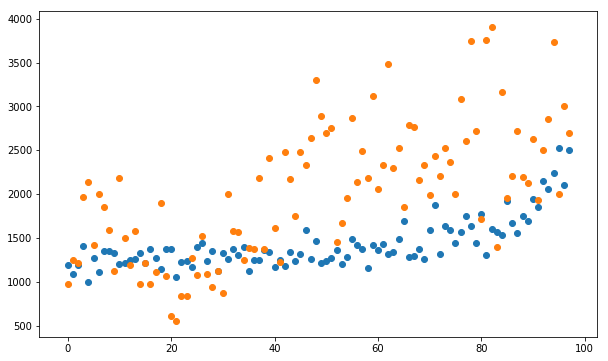

In [25]:
def getMovingAve(movingAveSize, scores):
    movingAve = []
    
    for i in range(len(scores) // movingAveSize):
        if (i + 1) * movingAveSize < len(scores):
            movingAve.append(np.mean(scores[i*movingAveSize:(i+1)*movingAveSize]))
    return movingAve


def mapScores():
    movingAveSize = 5
    
    movingAveA = getMovingAve(movingAveSize*5, gameScoreLog)
    movingAveB = getMovingAve(movingAveSize, greedyScoreLog)
    
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(len(movingAveA)),movingAveA)
    plt.scatter(np.arange(len(movingAveB)),movingAveB)
    
mapScores()

In [26]:
def testAgent():
    games = 500
    
    scores = np.zeros(games)
    
    for i in range(games):
        scores[i] = (run(initializeEnv(),agent,memCount,True))
    
    print("Average Score: ", np.mean(scores))
    print("Std Deviation: ", format(np.std(scores),'.2f'))
    print("Time elapsed:  ", format(time.time() - startTime, '.2f'))
    

testAgent()

Average Score:  2523.704
Std Deviation:  1048.44
Time elapsed:   438.53


In [27]:
agent.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 1028      
Total params: 136,964
Trainable params: 136,964
Non-trainable params: 0
_________________________________________________________________
